# Regression

## Regression vs Classification

Regression (회귀)와 Classification(분류)의 가장 큰 차이점은 target variable이 연속적인지 불연속적인지다. 이번 강의에서는 연속적일 때 regression 을 수행하는 방법들에 대해서 소개한다

언제나 그렇듯, 필수 라이브러리들을 추가한다. 이번에는 seaborn 이라는 라이브러리를 처음 사용해본다.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression        # linear regression 
from sklearn.metrics import r2_score                     # 모델의 성능 평가 

판다스를 사용하여 csv 파일을 읽오 데이터프레임어 저장하자. 

In [6]:
sns.set()
%matplotlib inline

df = pd.read_csv("SalaryData.csv")

지난번과 마찬가지로, 데이터를 트레이닝 데이터, 테스트 데이터로 나눈다. 

In [3]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

트레이닝데이터를 우선 복사하여 새로운 데이터프레임을 생성한다.

In [4]:
df_copy = train_set.copy()

데이터를 scatter plot을 이용하여 그려본다. 

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


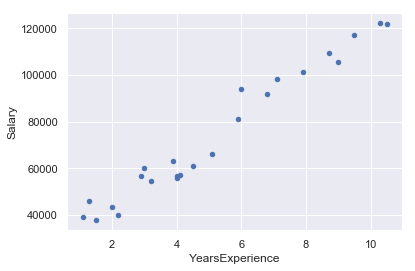

In [7]:
df_copy.plot.scatter(x='YearsExperience', y='Salary')

데이터간의 상관 관계를 구해보자. corr()명령어를 사용하면 쉽게 구할 수 있다.

In [8]:
df_copy.corr()

,YearsExperience,Salary
YearsExperience,1.00000,0.98211
Salary,0.98211,1.00000


트레이닝 데이터의 x(입력)값과 y(출력)값을 구분하자. (모델에서 사용된다)

In [12]:

train_x = train_set.drop(["Salary"], axis=1)
train_y = df_copy["Salary"]

아래와 같이 단 2줄만에 linear regression 을 수행한다.

In [13]:
lin_reg = LinearRegression()

lin_reg.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [14]:
print("Coefficients: ", lin_reg.coef_)
print("Intercept: ", lin_reg.intercept_)

Coefficients:  [9423.81532303]
Intercept:  25321.583011776813


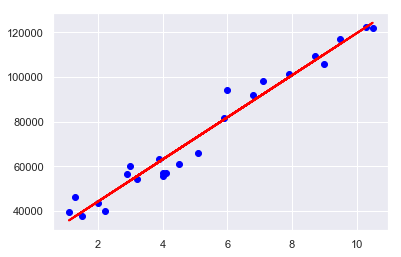

In [17]:
plt.scatter(train_x, train_y,  color='blue')
y_hat = lin_reg.predict(train_x)
plt.plot(train_x, y_hat, color='red', linewidth=2)

seaborn 에서도 regression plot을 활용하여 자체적으로 할 수 있다.

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


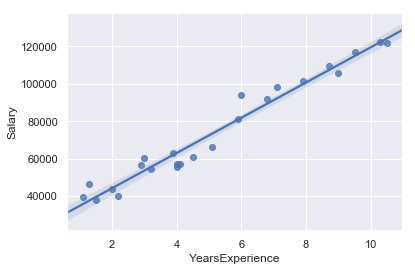

In [18]:
# Regression plot
sns.regplot('YearsExperience', # Horizontal axis
           'Salary', # Vertical axis
           data=df_copy)

# Simple Performance Evaluation

모델의 성능을 파악하자. 예측된 값과 실제값의 차이를 측정하여 알아본다.

In [19]:
r2_score(train_y, y_hat)

0.9645401573418146

## testing 데이터에 모델 적용 및 간단한 평가

그렇다면 test data에서도 같이 적용하여 r2를 측정하여본다.

In [21]:
test_x = test_set.drop(["Salary"], axis=1)
test_y = test_set["Salary"]

In [23]:
y_pred = lin_reg.predict(test_x)
r2_score(test_y, y_pred)

0.9024461774180497